In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
dataset.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
dataset.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [5]:
dataset.drop(columns=['society',"balcony","availability","area_type"],inplace=True)

In [6]:
dataset.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [7]:
dataset['location'] = dataset['location'].fillna('Whitefield')
dataset['size'] = dataset['size'].fillna('2 BHK')
dataset['bath'] = dataset['bath'].fillna(dataset['bath'].median())

In [8]:
dataset.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [9]:
dataset['BHK']= dataset['size'].str.split().str.get(0).astype(int)

In [10]:
def range_converer(x):
    N = x.split('-')
    if len(N) == 2:
        return (float(x[0])+float(x[1]))/2
    try:
        return float(x)
    except:
        return None

In [11]:
dataset['total_sqft'] = dataset['total_sqft'].apply(range_converer)

In [12]:
dataset.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [13]:
dataset["price_per_sqft"] = (dataset["price"]*100000)/dataset["total_sqft"]

In [14]:
dataset.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [15]:
dataset['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [16]:
dataset['location'] = dataset['location'].apply(lambda x:x.strip())

In [17]:
dataset.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [18]:
location_count = dataset['location'].value_counts()

In [19]:
print(location_count)

Whitefield                        542
Sarjapur  Road                    399
Electronic City                   304
Kanakpura Road                    273
Thanisandra                       237
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: location, Length: 1294, dtype: int64


In [21]:
location_count_less = location_count[location_count<=15]
location_count_less

Benson Town                       15
Nagavarapalya                     15
Kodihalli                         15
Varthur Road                      15
Chamrajpet                        15
                                  ..
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
singapura paradise                 1
Abshot Layout                      1
Name: location, Length: 1113, dtype: int64

In [22]:
dataset['location'] = dataset['location'].apply(lambda x:'other' if x in location_count_less else x)

In [23]:
dataset['location'].value_counts()

other                    3646
Whitefield                542
Sarjapur  Road            399
Electronic City           304
Kanakpura Road            273
                         ... 
Kereguddadahalli           16
Banashankari Stage VI      16
Cooke Town                 16
Kasturi Nagar              16
Parappana Agrahara         16
Name: location, Length: 182, dtype: int64

In [24]:
dataset.describe()

,total_sqft,bath,price,BHK,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1531.448708,2.688814,112.565627,2.802778,7.629203e+04
std,1243.564986,1.338754,148.971674,1.294496,8.111395e+05
min,0.500000,1.000000,8.000000,1.000000,2.678298e+02
25%,1096.000000,2.000000,50.000000,2.000000,4.284323e+03
50%,1265.000000,2.000000,72.000000,3.000000,5.497606e+03
75%,1660.000000,3.000000,120.000000,3.000000,7.486711e+03
max,52272.000000,40.000000,3600.000000,43.000000,3.180000e+07


In [25]:
dataset = dataset[(dataset['total_sqft']/dataset['BHK'])>=300]
dataset = dataset[dataset['BHK']<=5]
dataset = dataset[dataset['bath']<=5]

In [26]:
dataset

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [27]:
dataset.shape

(12034, 7)

In [28]:
dataset = dataset[['location','total_sqft','BHK','bath','price']]

In [29]:
lower_limit = dataset['price'].mean()-dataset['price'].std()*3
upper_limit = dataset['price'].mean()+dataset['price'].std()*3
dataset['price'] = np.where(dataset['price']>upper_limit, 
                            upper_limit,
            np.where(dataset['price']<lower_limit,lower_limit,dataset['price']))

<ipython-input-29-de2f6ad7d2c8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['price'] = np.where(dataset['price']>upper_limit,


In [30]:
dataset.head()

,location,total_sqft,BHK,bath,price
0,Electronic City Phase II,1056.0,2,2.0,39.07
1,Chikka Tirupathi,2600.0,4,5.0,120.00
2,Uttarahalli,1440.0,3,2.0,62.00
3,Lingadheeranahalli,1521.0,3,3.0,95.00
4,Kothanur,1200.0,2,2.0,51.00


In [31]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

In [32]:
from sklearn.model_selection import train_test_split

c:\Users\53061\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [33]:
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [34]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(
    
    transformers =[
        ('encoder', OneHotEncoder(),['location']),
        ('scaler', StandardScaler(),['total_sqft','BHK','bath'])
    ],
    remainder = 'passthrough'
)

In [35]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 300)

In [36]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(ct,model)

In [37]:
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  ['location']),
                                                 ('scaler', StandardScaler(),
                                                  ['total_sqft', 'BHK',
                                                   'bath'])])),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=300))])

In [38]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder', OneHotEncoder(),
                                                  ['location']),
                                                 ('scaler', StandardScaler(),
                                                  ['total_sqft', 'BHK',
                                                   'bath'])])),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=300))])

In [39]:
from sklearn.metrics import r2_score
y_pred = pipe.predict(X_test)
print("R2 score:",r2_score(y_test,y_pred))

R2 score: 0.7062294426276344


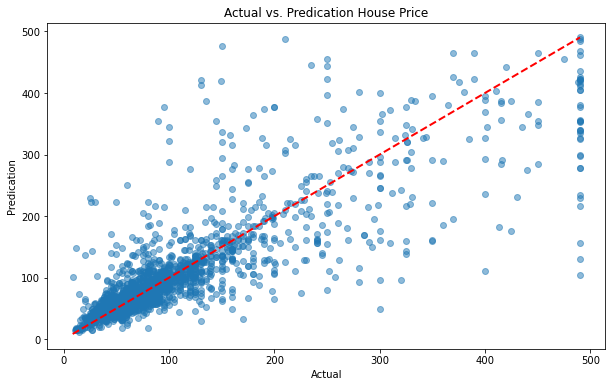

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred,alpha=0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],"r--",lw=2)
plt.xlabel('Actual')
plt.ylabel('Predication')
plt.title('Actual vs. Predication House Price')
plt.show()

In [41]:
import pickle
pickle.dump(pipe, open('random_forest_house_price_model.pkl','wb'))
pickle.dump(dataset, open('dataset.pkl','wb'))

In [42]:
X_train

,location,total_sqft,BHK,bath
811,Bhoganhalli,2119.0,4,4.0
9754,Kasavanhalli,1575.0,2,2.0
11602,Marathahalli,1449.0,3,3.0
6405,Chandapura,1505.0,3,2.0
2371,Electronics City Phase 1,2040.0,3,3.0
...,...,...,...,...
13242,8th Phase JP Nagar,1500.0,3,2.0
5743,Electronics City Phase 1,995.0,2,2.0
5975,Whitefield,2500.0,3,3.0
949,other,1611.0,3,2.0
